**ARBOLES DE DECISION**

In [3]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score


In [4]:
# cargamos el DATASET y mostramos las primeres 5 filas
data = pd.read_csv('./Titanic-Dataset2.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,Braund,Mr Owen Harris,male,22.0,1,0,A/5 21171,725,NaN,S
2,1,1,Cumings,Mrs John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,712833,C85,C
3,1,3,Heikkinen,Miss Laina,female,26.0,0,0,STON/O2 3101282,7925,NaN,S
4,1,1,Futrelle,Mrs Jacques Heath (Lily May Peel),female,35.0,1,0,113803,531,C123,S
5,0,3,Allen,Mr William Henry,male,35.0,0,0,373450,805,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,38.420168,0.523008,0.381594,1.276607e+05
std,0.486592,0.836071,56.525211,1.102743,0.806057,4.111230e+05
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2.000000,21.000000,0.000000,0.000000,1.610000e+02
50%,0.000000,3.000000,29.000000,0.000000,0.000000,2.625000e+03
75%,1.000000,3.000000,40.000000,1.000000,0.000000,7.895800e+04
max,1.000000,3.000000,705.000000,8.000000,6.000000,5.123292e+06


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

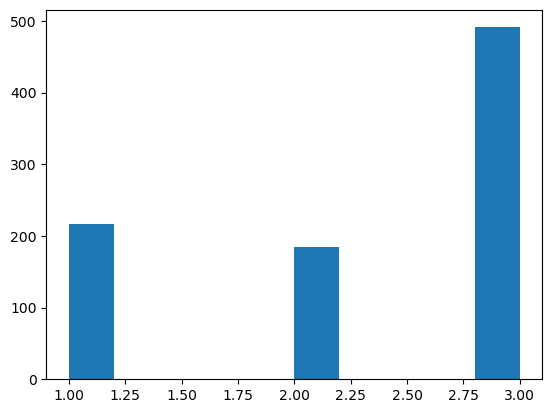

In [10]:
plt.hist(data.Survived)

<Axes: xlabel='Age', ylabel='SibSp'>

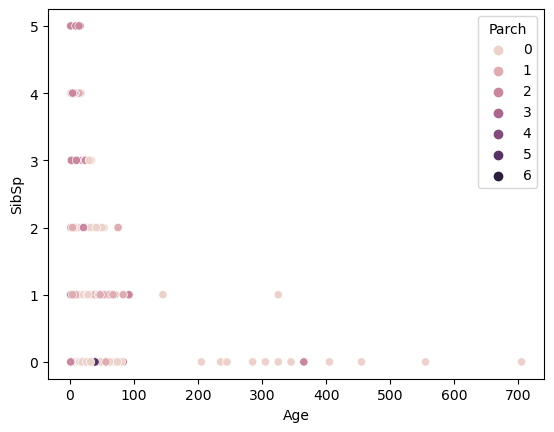

In [11]:
sns.scatterplot(x = "Age", y = "SibSp", hue = "Parch", data = data)

In [22]:
predictors_col = ["Age","SibSp","Parch", "SibSp","Survived","Fare"]
target_col = ['Survived']

predictors = data[predictors_col]
target = data[target_col]

In [19]:
predictors

,Age,SibSp,Parch,SibSp,Ticket,Fare
1,22.0,1,0,1,A/5 21171,725
2,38.0,1,0,1,PC 17599,712833
3,26.0,0,0,0,STON/O2 3101282,7925
4,35.0,1,0,1,113803,531
5,35.0,0,0,0,373450,805
...,...,...,...,...,...,...
887,27.0,0,0,0,211536,13
888,19.0,0,0,0,112053,30
889,NaN,1,2,1,W/C 6607,2345
890,26.0,0,0,0,111369,30


In [25]:
target

,Survived
1,3
2,1
3,3
4,1
5,3
...,...
887,2
888,1
889,3
890,1


In [26]:
corr = predictors.corr()
corr

,Age,SibSp,Parch,SibSp,Survived,Fare
Age,1.000000,-0.138789,-0.066485,-0.138789,-0.017701,-0.014245
SibSp,-0.138789,1.000000,0.414838,1.000000,0.083081,-0.027361
Parch,-0.066485,0.414838,1.000000,0.414838,0.018443,0.046245
SibSp,-0.138789,1.000000,0.414838,1.000000,0.083081,-0.027361
Survived,-0.017701,0.083081,0.018443,0.083081,1.000000,-0.296741
Fare,-0.014245,-0.027361,0.046245,-0.027361,-0.296741,1.000000


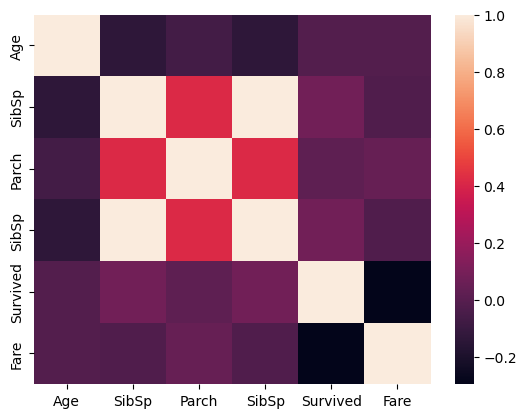

In [27]:
sns.heatmap(corr)
plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [29]:
tree = DecisionTreeClassifier()

In [33]:
print(x_train.isnull().sum())

Age         141
SibSp         0
Parch         0
SibSp         0
Survived      0
Fare          0
dtype: int64


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Imputar valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Verificar que no hay valores faltantes después de la imputación
print(pd.DataFrame(x_train_imputed).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [35]:
# Ajustar el modelo de árbol de decisión
tree = DecisionTreeClassifier()
arbol = tree.fit(x_train_imputed, y_train)

In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Supongamos que `x_train` y `y_train` son tus conjuntos de datos de entrenamiento

# Verificar valores faltantes
print("Valores faltantes en x_train antes de la imputación:\n", x_train.isnull().sum())

# Imputar valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Verificar que no hay valores faltantes después de la imputación
print("Valores faltantes en x_train después de la imputación:\n", pd.DataFrame(x_train_imputed).isnull().sum())

# Ajustar el modelo de árbol de decisión
tree = DecisionTreeClassifier()
arbol = tree.fit(x_train_imputed, y_train)

# Ahora puedes usar el modelo `arbol` para hacer predicciones

Valores faltantes en x_train antes de la imputación:
 Age         141
SibSp         0
Parch         0
SibSp         0
Survived      0
Fare          0
dtype: int64
Valores faltantes en x_train después de la imputación:
 0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


[Text(0.6, 0.8333333333333334, 'x[4] <= 2.5\ngini = 0.601\nsamples = 712\nvalue = [179, 148, 385]'),
 Text(0.4, 0.5, 'x[4] <= 1.5\ngini = 0.496\nsamples = 327\nvalue = [179, 148, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 179\nvalue = [179, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 148\nvalue = [0, 148, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 385\nvalue = [0, 0, 385]')]

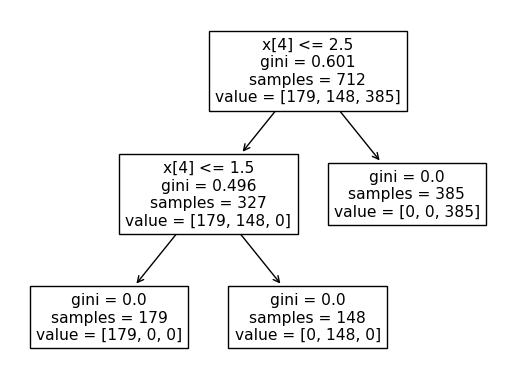

In [38]:
plot_tree(arbol)

In [40]:
print(x_test.isnull().sum())

Age         36
SibSp        0
Parch        0
SibSp        0
Survived     0
Fare         0
dtype: int64


In [46]:
# Imputar valores faltantes en x_test con la media de cada columna (utilizando el mismo imputer que para x_train)
x_test_imputed = imputer.transform(x_test)

# Verificar que no hay valores faltantes después de la imputación
print(pd.DataFrame(x_test_imputed).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [47]:
predicciones

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 3, 1,
       3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 1, 3, 2,
       1, 3, 1], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0